# Text Extraction from a Multi-Language TXT Document

PyMuPDF can open plain text files as a `fitz.Document`. When extracting text with all details, characters from the extended Latin unicode range (including Cyrillic and Greek) will be reported as written with a (Courier-compatible) monospace font.

The support however extends to any text written in ASCII, UTF-8 or UTF-16 encoding.

This notebook demonstrates that the extraction mechanism can dynamically react to the correct language encountered with each character and will report an appropriate font name from Google's Noto font library.

In [18]:
def show_image(item, title):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: a PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and uses matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set titel of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

This text reports the encounter of the following fonts:
['Nimbus Mono PS Regular',
 'Noto Naskh Arabic Regular',
 'Noto Serif Tamil Regular',
 'Noto Serif Thai Regular',
 'Noto Serif Regular',
 'Noto Serif Hebrew Regular',
 'Noto Serif Bengali Regular',
 'Droid Sans Fallback Regular',
 'Noto Serif Devanagari Regular']


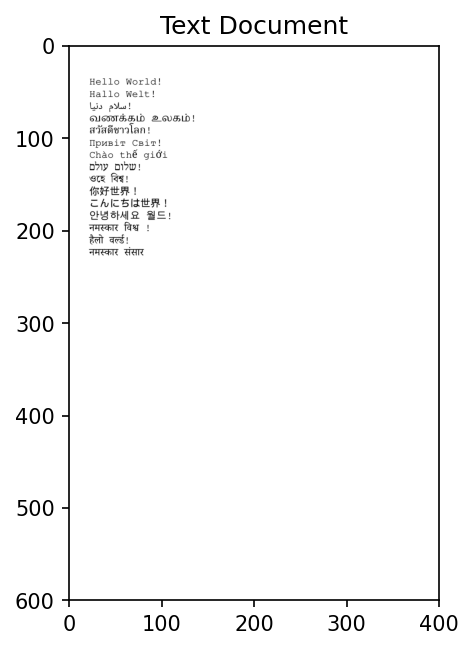

In [19]:
import fitz
from pprint import pprint

# The "Hello World" greeting in languages from all over the world.
# Translations by Google
greetings = (
    "Hello World!",  # english
    "Hallo Welt!",  # german
    "سلام دنیا!",  # persian
    "வணக்கம் உலகம்!",  # tamil
    "สวัสดีชาวโลก!",  # thai
    "Привіт Світ!",  # ucranian
    "Chào thế giới",  # vietnamese
    "שלום עולם!",  # hebrew
    "ওহে বিশ্ব!",  # bengali
    "你好世界！",  # chinese
    "こんにちは世界！",  # japanese
    "안녕하세요 월드!",  # korean
    "नमस्कार विश्व !",  # sanskrit
    "हैलो वर्ल्ड!",  # hindi
    "नमस्कार संसार",  # nepali
)
text = "\n".join(greetings)

doc = fitz.open("txt", text.encode())
page = doc[0]
show_image(page,"Text Document")
text_items = page.get_text("dict")  # extracts all text detail
fonts = list()  # all fonts ever encountered
for block in text_items["blocks"]:
    for line in block["lines"]:
        for span in line["spans"]:
            font = span["font"]
            if not font in fonts:
               fonts.append(span["font"])
print("This text reports the encounter of the following fonts:")
pprint(fonts)